In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly

import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv",index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 32)

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

# drop col 32 contains null values only

In [6]:
df.drop(['Unnamed: 32'],axis=1)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.isnull().sum()


diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [9]:
df=df.drop('Unnamed: 32',axis=1)

In [10]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

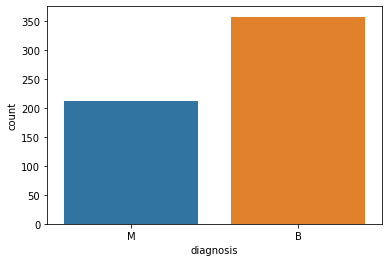

In [11]:
#data set is balanced,we are good to go
#plottinf each class freq

sns.countplot(x='diagnosis',data=df)
plt.show()



In [12]:
df.shape

(569, 31)

In [13]:
##using SelectKBest feature Selection method
#SelectKBest  uses f_classif fn to find best features ,wehere f_classif uses Anova test


In [14]:
from sklearn.feature_selection import SelectKBest,f_classif

In [15]:
#replace label col (diagnosis) in to binary values

df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})


In [16]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [17]:
X=df.drop('diagnosis',axis=1)
y=df.diagnosis


In [18]:
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [19]:
best_features = SelectKBest(score_func=f_classif ,k=17)


In [20]:
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns =pd.DataFrame(X.columns)


In [21]:
df_columns

,0
0,radius_mean
1,texture_mean
2,perimeter_mean
3,area_mean
4,smoothness_mean
5,compactness_mean
6,concavity_mean
7,concave points_mean
8,symmetry_mean
9,fractal_dimension_mean


In [22]:
df_scores

,0
0,646.981021
1,118.096059
2,697.235272
3,573.060747
4,83.651123
5,313.233079
6,533.793126
7,861.676020
8,69.527444
9,0.093459


In [23]:
#concatenate dataframes

features_scores =pd.concat([df_columns,df_scores],axis=1 )
features_scores

,0,0
0,radius_mean,646.981021
1,texture_mean,118.096059
2,perimeter_mean,697.235272
3,area_mean,573.060747
4,smoothness_mean,83.651123
5,compactness_mean,313.233079
6,concavity_mean,533.793126
7,concave points_mean,861.676020
8,symmetry_mean,69.527444
9,fractal_dimension_mean,0.093459


In [24]:
features_scores.columns = ['Feature_Name','Score']  #Name o/p col
features_scores

,Feature_Name,Score
0,radius_mean,646.981021
1,texture_mean,118.096059
2,perimeter_mean,697.235272
3,area_mean,573.060747
4,smoothness_mean,83.651123
5,compactness_mean,313.233079
6,concavity_mean,533.793126
7,concave points_mean,861.676020
8,symmetry_mean,69.527444
9,fractal_dimension_mean,0.093459


In [25]:
print(features_scores.nlargest(17,'Score'))  #print 17 best features ,#nlargest -no of largest based on score

            Feature_Name       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880


# Moodel Building

In [26]:
new_X=( df[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst',
           'radius_mean','area_mean','concavity_mean','concavity_worst','compactness_mean','compactness_worst',
           'radius_se','perimeter_se','area_se','texture_worst','smoothness_worst']]) 
          # choose the 17 features from the above result

new_X

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
id,,,,,,,,,,,,,,,,,
842302,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220
842517,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398,74.08,23.41,0.12380
84300903,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585,94.03,25.53,0.14440
84348301,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445,27.23,26.50,0.20980
84358402,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438,94.44,16.67,0.13740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673,158.70,26.40,0.14100
926682,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203,99.04,38.25,0.11660
926954,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425,48.55,34.12,0.11390


In [27]:
scalar=StandardScaler()
X_scalar=scalar.fit_transform(new_X)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X_scalar,y,test_size=0.25,random_state=355)     ##clf-classifier



In [136]:
def metric_score(clf,x_train,x_test,y_train,y_test,train):
    if train:
        y_pred = clf.predict(x_train)
        
        print("Accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        print(classification_report(y_train,y_pred,digits=3))
    elif train==False:
        pred=clf.predict(x_test)
        print("Accuracy score: {accuracy_score(y_test,pred)*100:.2f}%")
        print(classification_report(y_test,pred,digits=2))

In [137]:
#Call the fn and pass the values in to the fn

metric_score(knn,x_train,x_test,y_train,y_test,train=True )   #for traiining score

Accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%
              precision    recall  f1-score   support

           0      0.989     0.992     0.991       264
           1      0.988     0.981     0.985       162

    accuracy                          0.988       426
   macro avg      0.988     0.987     0.988       426
weighted avg      0.988     0.988     0.988       426



In [125]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False )   #for testing score

Accuracy score: {accuracy_score(y_test,pred)*100:.2f}%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [35]:
#initiate KNeighborsClassifier
knn= KNeighborsClassifier()

In [36]:
#model training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
y_pred = knn.predict(x_train)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [40]:
pred=knn.predict(x_test)
pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [41]:
#accuracy_score for training data

accuracy_score(y_train,y_pred)

0.9882629107981221

In [42]:
#accuracy_score for testing data

accuracy_score(y_test,pred)

0.958041958041958

In [43]:
classification_report(y_test,pred,digits=2)

'              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97        93\n           1       0.96      0.92      0.94        50\n\n    accuracy                           0.96       143\n   macro avg       0.96      0.95      0.95       143\nweighted avg       0.96      0.96      0.96       143\n'

# 4-sept live

CROSS VALIDATION METHODS
	
    *Hold out method(-train test method)
	
    
    *K-fold cross validation
	
    *loocv(Leave one out crossvalidation)

#    #kfold method

In [44]:
from sklearn.model_selection import KFold,cross_val_score

In [45]:
k_f =KFold(n_splits=3)

In [46]:
k_f

KFold(n_splits=3, random_state=None, shuffle=False)

In [47]:
#for practice

for train,test in k_f.split([1,2,3,4,5,6,7,8,9]):
    print('train:',train,'test:',test)

train: [3 4 5 6 7 8] test: [0 1 2]
train: [0 1 2 6 7 8] test: [3 4 5]
train: [0 1 2 3 4 5] test: [6 7 8]


In [48]:
KFold(n_splits=3, random_state=3, shuffle=True)

KFold(n_splits=3, random_state=3, shuffle=True)

In [49]:
#for practice

for train,test in k_f.split([1,2,3,4,5,6,7,8,9]):
    print('train:',train,'test:',test)

train: [3 4 5 6 7 8] test: [0 1 2]
train: [0 1 2 6 7 8] test: [3 4 5]
train: [0 1 2 3 4 5] test: [6 7 8]


# cross validation score to check if the model is overfitting

In [50]:
cross_val_score(knn, X_scalar, y, cv=5)    #model,fetures,label 

array([0.96491228, 0.96491228, 0.97368421, 0.98245614, 0.96460177])

In [51]:
#or 
cross_val_score(KNeighborsClassifier(),X_scalar,y,cv=5).mean()

0.9701133364384411

# hyperparameter tuning

1.GridSearchCV

2.RandamizedSearchCV

In [141]:
##lets use gridsearch for the best parameter to improve the accuracy


from sklearn.model_selection import GridSearchCV
XYZ = { 'algorithm' :['kdtree','brute'],
        'leaf_size' :[3,5,6,7,8] ,
        'n_neighbors':[3,5,7,9,11,13] }

In [142]:
gridsearch = GridSearchCV(estimator=knn,param_grid=XYZ)   #(estimator=type of algorithm using


In [146]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [143]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kdtree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [56]:


#if u want to check the confusion_matrix u can check

y_pred=knn.predict(x_test)
cfm=confusion_matrix(y_test,y_pred)
cfm


array([[91,  2],
       [ 4, 46]], dtype=int64)

# 
------------------------------------------------------------------------------------------------
=====================================4sep=============================
=============================1hr31m-----------------------------------------------------------------------------------


In [57]:

df= pd.DataFrame({'salary':[25000,48000,71000,85000,90000,55000],
        'City' :['bglr','del','hyd','bglr','hyd','bglr'],
        'gender':['male','female','female','female','male','male'],
        'Exp':[1,3,5,6,9,None] })

In [58]:
df

,salary,City,gender,Exp
0,25000,bglr,male,1.0
1,48000,del,female,3.0
2,71000,hyd,female,5.0
3,85000,bglr,female,6.0
4,90000,hyd,male,9.0
5,55000,bglr,male,NaN


# encoders and imputers

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
lab_enc= LabelEncoder()
df2 =lab_enc.fit_transform(df['City'])       #uit will sort it based on alphabetically of each type in it and encode it
df2

array([0, 1, 2, 0, 2, 0])

In [61]:
pd.Series(df2)

0    0
1    1
2    2
3    0
4    2
5    0
dtype: int32

In [62]:

df['City']=df2
df

,salary,City,gender,Exp
0,25000,0,male,1.0
1,48000,1,female,3.0
2,71000,2,female,5.0
3,85000,0,female,6.0
4,90000,2,male,9.0
5,55000,0,male,NaN


In [63]:
df3=lab_enc.fit_transform(df['gender'])
df3

array([1, 0, 0, 0, 1, 1])

In [64]:
df['gender']=pd.Series(df3)

In [65]:
df

,salary,City,gender,Exp
0,25000,0,1,1.0
1,48000,1,0,3.0
2,71000,2,0,5.0
3,85000,0,0,6.0
4,90000,2,1,9.0
5,55000,0,1,NaN


In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [100]:
ohe =OneHotEncoder
si = SimpleImputer


In [101]:
import pandas as pd

df=pd.DataFrame({'salary':[25000,48000,71000,85000,90000,55000],
        'City' :['bglr','del','hyd','bglr','hyd','bglr'],
        'gender':['male','female','female','female','male','male'],
        'exp':[1,3,5,6,9,None]})

In [102]:
ct=make_column_transformer(
            (ohe,['City','gender']),
            (si,['exp']),
            remainder= 'passthrough')

ct         #'passthrough'to keep all other columns

ColumnTransformer(remainder='passthrough',
                  transformers=[('type-1',
                                 <class 'sklearn.preprocessing._encoders.OneHotEncoder'>,
                                 ['City', 'gender']),
                                ('type-2',
                                 <class 'sklearn.impute._base.SimpleImputer'>,
                                 ['exp'])])

In [70]:
encod1 = pd.DataFrame(ct.fit_transform(df))
encod1

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [ ]:
#rename the col as per our choice

encoded=pd,DataFrame(ct.fit_transform(df),columns=['bglr','del','hyd','male','female','exp','salary'])
encoded


#originak data set
df



# 
---------------------------------10sept--------------------------------------------
=====================================================================


In [71]:
##get_dummies
df1=pd.get_dummies(df[['City','gender']])
df1


,City_bglr,City_del,City_hyd,gender_female,gender_male
0,1,0,0,0,1
1,0,1,0,1,0
2,0,0,1,1,0
3,1,0,0,1,0
4,0,0,1,0,1
5,1,0,0,0,1


In [ ]:
df

In [72]:
df1=pd.get_dummies(df[['City','gender']],drop_first = True)               #for removing first column form from each category 
df1

,City_del,City_hyd,gender_male
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,0
4,0,1,1
5,0,0,1


# Ordinal Encoder

In [98]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd


In [74]:
Employee = pd.DataFrame({'Position':['SE','mngr','team lead','SSE'],
			'Project':['A','B','C','D'],
			'Salary':[25000,85000,71000,48000]})
Employee 

,Position,Project,Salary
0,SE,A,25000
1,mngr,B,85000
2,team lead,C,71000
3,SSE,D,48000


In [75]:
ord_enc = OrdinalEncoder( categories=[['SE','SSE','team lead','mngr'],['A','B','C','D']])  
#sort (organise )the data to be given in the hierarchy we want


Encoded_df = ord_enc.fit_transform(Employee[['Position','Project']])


In [76]:
Encoded_df

array([[0., 0.],
       [3., 1.],
       [2., 2.],
       [1., 3.]])

# Binary Encoders

In [77]:
df =pd.DataFrame({'cat_data' : ['A','B','C','D','E','F','G','H','I','A','A','D']})

df


,cat_data
0,A
1,B
2,C
3,D
4,E
5,F
6,G
7,H
8,I
9,A


In [78]:
#30min======================================================

!pip install category_encoders

In [79]:
from category_encoders import BinaryEncoder
from  sklearn.preprocessing import OneHotEncoder

In [80]:
bi_enc = BinaryEncoder()

In [81]:
df_bi = bi_enc.fit_transform(df)               #converts the data in to binary value

In [82]:
df_bi

,cat_data_0,cat_data_1,cat_data_2,cat_data_3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,1
3,0,1,0,0
4,0,1,0,1
5,0,1,1,0
6,0,1,1,1
7,1,0,0,0
8,1,0,0,1
9,0,0,0,1


In [83]:
#binarty encoder is really good if we have more than 5 categories in the data
#in this eg we have 5 categories for the data

# Comparing With OneHotEncoder

In [84]:
ohe= OneHotEncoder(sparse=False)
ohe.fit_transform(df[['cat_data']])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [85]:
#   if the no of categories is less than 5 we can use one hot encoder
#in this eg we have 9 categories for the data


# Knn Imputer

In [86]:



df=pd.DataFrame({'salary':[25000,48000,71000,85000,90000,55000],
		'City' :['bglr','del','hyd','bglr','hyd','bglr'],
		'gender':['male','female','female','female','male','male'],
		'exp':[1,3,5,6,9,None]})

In [87]:
df

,salary,City,gender,exp
0,25000,bglr,male,1.0
1,48000,del,female,3.0
2,71000,hyd,female,5.0
3,85000,bglr,female,6.0
4,90000,hyd,male,9.0
5,55000,bglr,male,NaN


In [88]:
#knn imputer will try to find the relationship b/w other column and impute the data accordingly
#in this case age Nan is depending up on the similarity with salary column


In [89]:
from sklearn.impute import KNNImputer

In [90]:
knnimp = KNNImputer(n_neighbors=2 )         #pick 2 neighboring data from the data

knn_imp = pd.DataFrame(knnimp.fit_transform(df[['salary','exp']]))           #takes the avg of the 2 data picked

In [91]:
knn_imp

,0,1
0,25000.0,1.0
1,48000.0,3.0
2,71000.0,5.0
3,85000.0,6.0
4,90000.0,9.0
5,55000.0,4.0


In [92]:
#40 min ===================================

# Iterative Imputer

In [93]:
##This method treats other columns which does not have nulls as feature and train on them and treat null column as label.
#Finally it will predict the nan data and impute .Its just like regression problem.Here null column is label .

In [94]:
#we need to import below library before importing the iterative iputer
from sklearn.experimental import enable_iterative_imputer

In [95]:
#import iterative imputer

from sklearn.impute import IterativeImputer

In [96]:
df=pd.DataFrame({'Salary':[25000,48000,71000,85000,90000,55000],
		'City' :['bglr','del','hyd','bglr','hyd','bglr'],
		'Gender':['male','female','female','female','male','male'],
		'Exp':[1,3,5,6,9,None]})

df

,Salary,City,Gender,Exp
0,25000,bglr,male,1.0
1,48000,del,female,3.0
2,71000,hyd,female,5.0
3,85000,bglr,female,6.0
4,90000,hyd,male,9.0
5,55000,bglr,male,NaN


In [97]:
iter_impute= IterativeImputer()

iter_imp = pd.DataFrame(iter_impute.fit_transform(df[['Salary','Exp']]),columns=['Salary','Exp']) 
#feature ,label in data set inside and final column name of the o/p  in the order given

iter_imp

,Salary,Exp
0,25000.0,1.000000
1,48000.0,3.000000
2,71000.0,5.000000
3,85000.0,6.000000
4,90000.0,9.000000
5,55000.0,3.864759
